In [2]:
import torch 
import torch.nn.functional as F


ki=torch.nn.Softmax(dim=-1)

inp=torch.rand((10,20))
out=ki(inp)
F.one_hot(torch.argmax(ki(inp),dim=-1),num_classes=inp.shape[-1]).shape

torch.Size([10, 20])

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from model import *

In [5]:

def count(num):
    std=[num,num,num-2,num]
    killi=model.subUnit(*std)
    return sum(p.numel() for p in killi.parameters() if p.requires_grad)


import matplotlib.pyplot as plt
plt.plot([count(n) for n in range(30)])
plt.show()

NameError: name 'model' is not defined

In [82]:
from model import *
k=2
s2i = subUnit(k,k)
s2u = subUnit(k,k,unit=subUnit)

def countP(mod):
    return sum(p.numel() for p in mod.parameters() if p.requires_grad)
countP(s2i),countP(s2u)

(8, 16)

In [86]:
k=100
crazy=Unit(k,k,4,4)# dim*depth * sub_dim*sub_depth + dim*sub_dim
countP(crazy),k**5+k**4

(800000, 10100000000)

In [ ]:
10000

In [78]:
x=[]
y=[]
z=[]
v=[]
for k in range(0,100,20):
    z.append(countP(subUnit(k,k)))
    x.append(k**3+k**2)
    y.append(countP(Unit(k,k)))
    v.append(k**5+k**4)


/home/pranav/miniconda3/envs/drosogpt/lib/python3.8/site-packages/torch/nn/init.py:412: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


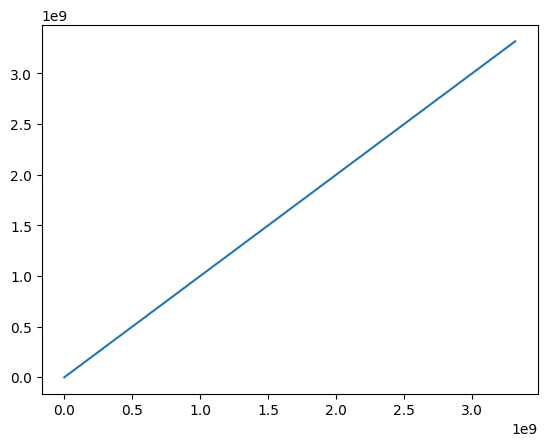

In [79]:
plt.plot(v,y)

In [81]:

k=4
countP(Unit(k,k)) 

1280

In [80]:
Unit(4,4)

Unit(
  (input): Linear(in_features=16, out_features=16, bias=False)
  (layers): ModuleList(
    (0-3): 4 x LayerList(
      (layer): ModuleList(
        (0-3): 4 x subUnit(
          (unit): ModuleList(
            (0-3): 4 x Linear(in_features=4, out_features=4, bias=False)
            (4): Softmax(dim=-1)
          )
        )
      )
    )
  )
)